In [1]:
# Py3_Jupyter_Nb_Pandas(金融RSI指标分析)_GF_2024-01-22.ipynb
# Create By GF 2024-01-22 23:26

In [2]:
import pandas as pd # -> Pandas Version 1.4.1
import matplotlib.pyplot as plt # -> Matplotlib Version 3.6.3

In [3]:
# Matplotlib 相关配置。
# ##################################################
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

In [4]:
# 全局变量(Global Variable)。
# ##################################################
RSI_Chg_List:list = []

In [5]:
# Map 函数 - 金融指标(Finance Indicator) - 相对强弱指标 (Finance - Relative Strength Index).
def MapFunc_FinInd_RSI(Index:int, Period:int, Change:float) -> float:

    # 相对强弱指标 RSI 是用以计测市场供需关系和买卖力道的方法及指标。
    # 
    # 公式一:
    # RSI(N) = A ÷ ( A + B ) × 100
    # A = N 日内收盘价所有上涨额度之和
    # B = N 日内收盘价所有下跌额度之和(取正数, 即乘以(-1))
    # 
    # 公式二:
    # RS(相对强度) = N日内收盘价所有上涨额度之和的平均值 ÷ N日内收盘价所有下跌额度之和的平均值(取绝对值)
    # RSI(相对强弱指标) = 100 - 100 ÷ ( 1 + RS )
    # 
    # 这两个公式虽然有些不同, 但计算的结果一样。
    # 
    # 股票 RSI 三条线分别为 RSI1, RSI2, RSI3。
    # RSI1 是白线，一般指 6 日相对强弱指标;
    # RSI2 是黄线，一般指 12 日相对强弱指标;
    # RSI3 是紫线，一般指 24 日相对强弱指标.
    # --------------------------------------------------
    global RSI_Chg_List
    
    # --------------------------------------------------
    if   (Index == 1):
        
        RSI_Chg_List.clear()
        # ..............................................
        RSI_Chg_List.append(Change)
        # ..............................................
        return None
    
    elif (1 < Index < Period):
        
        RSI_Chg_List.append(Change)
        # ..............................................
        return None
    
    else:
        
        # --------------------------------------------------
        RSI_Chg_List.append(Change)
        
        # ----------------------------------------------
        Idx = (Index - 1) # -> 由于行号索引是从 1 开始，但 Python 列表索引是从 0 开始, 所以需要减去 1。
        
        # 提取周期内上涨之和(Change Up)和周期内下跌之和(Change Down)。
        # ----------------------------------------------
        Chg_Up_Sum:float = 0.0 # -> 周期内的上涨之和.
        Chg_Dn_Sum:float = 0.0 # -> 周期内的下跌之和.
        # ..............................................
        Chg_Up_Sum = sum([RSI_Chg_List[i] for i in range((Idx + 1 - Period), (Idx + 1)) if RSI_Chg_List[i] >= 0.0])
        Chg_Dn_Sum = sum([RSI_Chg_List[i] * (-1) for i in range((Idx + 1 - Period), (Idx + 1)) if RSI_Chg_List[i] < 0.0])
        
        # 计算 RSI。
        # ----------------------------------------------
        # 每天既没上涨也没下跌, 最近 N 天的所有的 Up Move 之和是 0, 最近 N 天的所有的 Down Move 之和是 0, RS 会是 0 除以 0。
        # 但实际并不处于每天都是上涨或每天都是下跌的情况, 所以行情属于中性, 这种特殊情况定义 RSI 为 50。
        if   (Chg_Up_Sum == 0.0) and (Chg_Dn_Sum == 0.0):
            
            return float(50.0)
        
        # 每天都是下跌, 这将导致没有 Up Move 的日期, 最近 N 天的所有的 Up Move 之和是 0, Down Move 会是某个正数, 0 除以某个正数是 0。
        # 所以这种特殊情况会定义 RSI 为 0。
        elif (Chg_Up_Sum == 0.0) and (Chg_Dn_Sum != 0.0):
            
            return float(0.0)
        
        # 每天都是上涨, 这将导致没有 Down Move 的日期, 最近 N 天的所有的 Down Move 之和是 0, RS 会是某个正数除以 0, 数学上这是非法的。
        # 所以这种特殊情况会定义 RSI 为 100。
        elif (Chg_Up_Sum != 0.0) and (Chg_Dn_Sum == 0.0):
            
            return float(100.0)
        
        else:
            
            RS:float = (Chg_Up_Sum / Period) / (Chg_Dn_Sum / Period)
            # ..........................................
            RSI:float = (100 - 100 / (1 + RS))
            # ..............................................
            return RSI
    # ##################################################
    # End of Function.

In [6]:
# 读取 CSV。
# ##################################################
StkPDF = pd.read_csv("./Datas/Stock.csv")

In [7]:
# 转换类型: 初次读取后转换。
# ##################################################
StkPDF["Date"] = StkPDF["Date"].astype("datetime64[ns]")

# ##################################################
StkPDF

,Date,Code,Open,High,Low,Close,Pre_Close,Change,Chg_Pct,Turnover,Volume,Amount,Total,Circle
0,2015-12-31,'000422,7.93,7.95,7.76,7.77,7.93,-0.16,-0.020177,0.015498,13915200,109318000,6976420000,6976420000
1,2015-12-30,'000422,7.86,7.93,7.75,7.93,7.84,0.09,0.011480,0.018662,16755900,131567000,7120080000,7120080000
2,2015-12-29,'000422,7.72,7.85,7.69,7.84,7.71,0.13,0.016861,0.015886,14263800,110789000,7039280000,7039280000
3,2015-12-28,'000422,8.03,8.08,7.70,7.71,8.03,-0.32,-0.039851,0.030821,27672800,218869000,6922550000,6922550000
4,2015-12-25,'000422,8.03,8.05,7.93,8.03,7.99,0.04,0.005006,0.021132,18974000,151673000,7209870000,7209870000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,2005-02-04,'000422,6.75,7.05,6.71,7.00,6.75,0.25,0.037037,0.017178,2430800,16818500,1725750000,990538000
2648,2005-02-03,'000422,7.00,7.15,6.73,6.75,6.90,-0.15,-0.021739,0.028556,4040880,28086200,1664110000,955162000
2649,2005-02-02,'000422,6.42,6.99,6.42,6.90,6.42,0.48,0.074766,0.032928,4659550,31345900,1701090000,976388000
2650,2005-02-01,'000422,6.78,6.89,6.30,6.42,6.81,-0.39,-0.057269,0.027348,3869880,25333700,1582760000,908465000


In [8]:
# 筛选数据: 筛选出成交量 (Volume) 不为 0.0 的数据。
# ##################################################
StkPDF = StkPDF[StkPDF["Volume"] != 0.0]

# ##################################################
StkPDF

,Date,Code,Open,High,Low,Close,Pre_Close,Change,Chg_Pct,Turnover,Volume,Amount,Total,Circle
0,2015-12-31,'000422,7.93,7.95,7.76,7.77,7.93,-0.16,-0.020177,0.015498,13915200,109318000,6976420000,6976420000
1,2015-12-30,'000422,7.86,7.93,7.75,7.93,7.84,0.09,0.011480,0.018662,16755900,131567000,7120080000,7120080000
2,2015-12-29,'000422,7.72,7.85,7.69,7.84,7.71,0.13,0.016861,0.015886,14263800,110789000,7039280000,7039280000
3,2015-12-28,'000422,8.03,8.08,7.70,7.71,8.03,-0.32,-0.039851,0.030821,27672800,218869000,6922550000,6922550000
4,2015-12-25,'000422,8.03,8.05,7.93,8.03,7.99,0.04,0.005006,0.021132,18974000,151673000,7209870000,7209870000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,2005-02-04,'000422,6.75,7.05,6.71,7.00,6.75,0.25,0.037037,0.017178,2430800,16818500,1725750000,990538000
2648,2005-02-03,'000422,7.00,7.15,6.73,6.75,6.90,-0.15,-0.021739,0.028556,4040880,28086200,1664110000,955162000
2649,2005-02-02,'000422,6.42,6.99,6.42,6.90,6.42,0.48,0.074766,0.032928,4659550,31345900,1701090000,976388000
2650,2005-02-01,'000422,6.78,6.89,6.30,6.42,6.81,-0.39,-0.057269,0.027348,3869880,25333700,1582760000,908465000


In [9]:
# 计算数据: 分配行号。
# ##################################################
SourceDataPDF = StkPDF.copy()

# 排序计算: rank 函数达到 SQL 中类似 ROW_NUMBER 的功能。
# --------------------------------------------------
TEMPPDF = SourceDataPDF
# ..................................................
Sorted = TEMPPDF.sort_values("Date", ascending=True)
# ..................................................
TEMPPDF["Row_Num"] = Sorted["Date"].rank(ascending=True, method='first')
# ..................................................
TEMPPDF["Row_Num"] = TEMPPDF["Row_Num"].astype("int64")
# ..................................................
StkNumberedPDF = TEMPPDF

# ##################################################
StkNumberedPDF

,Date,Code,Open,High,Low,Close,Pre_Close,Change,Chg_Pct,Turnover,Volume,Amount,Total,Circle,Row_Num
0,2015-12-31,'000422,7.93,7.95,7.76,7.77,7.93,-0.16,-0.020177,0.015498,13915200,109318000,6976420000,6976420000,2567
1,2015-12-30,'000422,7.86,7.93,7.75,7.93,7.84,0.09,0.011480,0.018662,16755900,131567000,7120080000,7120080000,2566
2,2015-12-29,'000422,7.72,7.85,7.69,7.84,7.71,0.13,0.016861,0.015886,14263800,110789000,7039280000,7039280000,2565
3,2015-12-28,'000422,8.03,8.08,7.70,7.71,8.03,-0.32,-0.039851,0.030821,27672800,218869000,6922550000,6922550000,2564
4,2015-12-25,'000422,8.03,8.05,7.93,8.03,7.99,0.04,0.005006,0.021132,18974000,151673000,7209870000,7209870000,2563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2647,2005-02-04,'000422,6.75,7.05,6.71,7.00,6.75,0.25,0.037037,0.017178,2430800,16818500,1725750000,990538000,5
2648,2005-02-03,'000422,7.00,7.15,6.73,6.75,6.90,-0.15,-0.021739,0.028556,4040880,28086200,1664110000,955162000,4
2649,2005-02-02,'000422,6.42,6.99,6.42,6.90,6.42,0.48,0.074766,0.032928,4659550,31345900,1701090000,976388000,3
2650,2005-02-01,'000422,6.78,6.89,6.30,6.42,6.81,-0.39,-0.057269,0.027348,3869880,25333700,1582760000,908465000,2


In [10]:
# 计算数据: 金融指标(RSI)。
# ##################################################
SourceDataPDF = StkNumberedPDF.sort_values("Date", ascending=True)

# 计算 RSI。
# --------------------------------------------------
TEMPPDF = SourceDataPDF
# ..................................................
# DataFrame 中的 apply:
# -> 当 axis=1 时，对每行执行指定函数。
# -> 当 axis=0 时，对每列执行指定函数。
TEMPPDF["RSI6"] = TEMPPDF.apply(lambda X: MapFunc_FinInd_RSI(Index=X["Row_Num"], Period=6, Change=X["Change"]), axis=1)
TEMPPDF["RSI12"] = TEMPPDF.apply(lambda X: MapFunc_FinInd_RSI(Index=X["Row_Num"], Period=12, Change=X["Change"]), axis=1)
TEMPPDF["RSI24"] = TEMPPDF.apply(lambda X: MapFunc_FinInd_RSI(Index=X["Row_Num"], Period=24, Change=X["Change"]), axis=1)
# ..................................................
StkIndicatorPDF = TEMPPDF

# ##################################################
StkIndicatorPDF[["Row_Num", "Date", "Close", "RSI6", "RSI12", "RSI24"]]

,Row_Num,Date,Close,RSI6,RSI12,RSI24
2651,1,2005-01-31,6.81,NaN,NaN,NaN
2650,2,2005-02-01,6.42,NaN,NaN,NaN
2649,3,2005-02-02,6.90,NaN,NaN,NaN
2648,4,2005-02-03,6.75,NaN,NaN,NaN
2647,5,2005-02-04,7.00,NaN,NaN,NaN
...,...,...,...,...,...,...
4,2563,2015-12-25,8.03,78.431373,58.333333,55.942029
3,2564,2015-12-28,7.71,55.555556,51.470588,51.604278
2,2565,2015-12-29,7.84,50.769231,62.406015,52.741514
1,2566,2015-12-30,7.93,52.941176,61.832061,54.241645


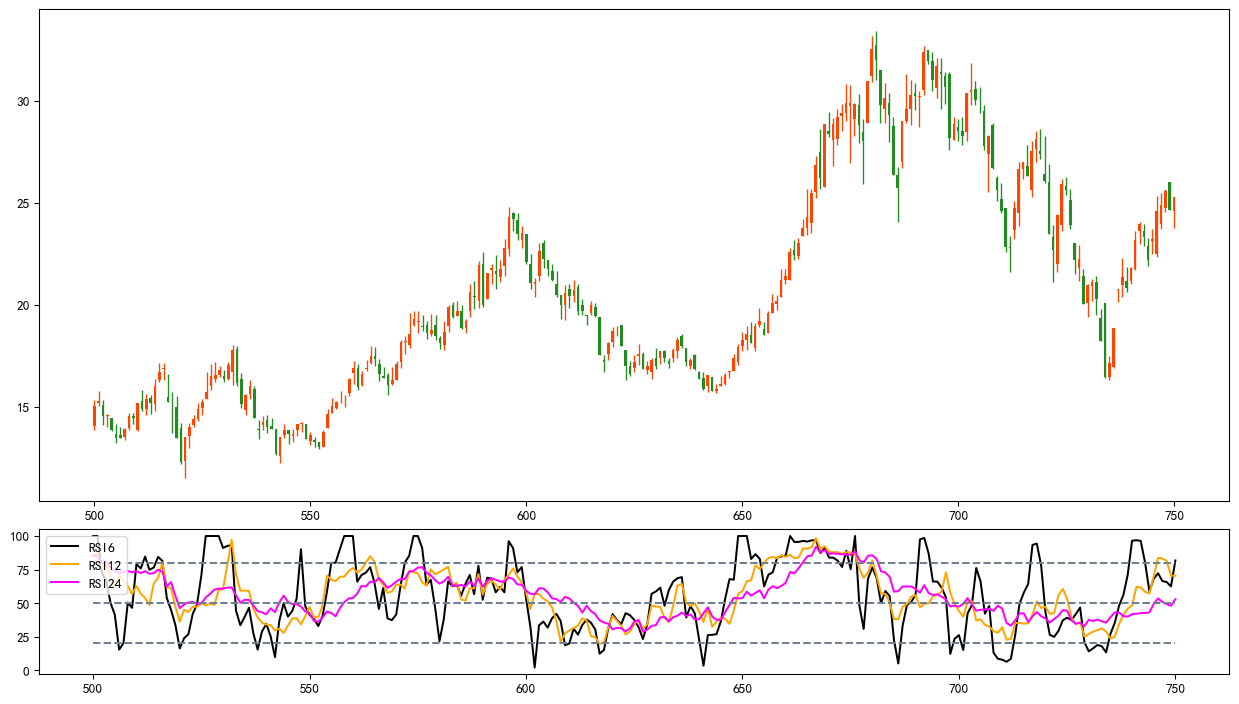

In [11]:
# Matplotlib 绘制数据。
# ##################################################
DrawPDF = StkIndicatorPDF

# 筛选数据: 放大局部数据。
# --------------------------------------------------
#DrawPDF = DrawPDF[(200 <= DrawPDF["Row_Num"]) & (DrawPDF["Row_Num"] <= 1500)]
DrawPDF = DrawPDF[(500 <= DrawPDF["Row_Num"]) & (DrawPDF["Row_Num"] <= 750)]

# 画布配置。
# --------------------------------------------------
fig = plt.figure(figsize=(16, 9), dpi=96)
Grid = plt.GridSpec(4, 1, figure=fig)

# K 线数据: 红绿 K 线的 Bottom、Height。
# --------------------------------------------------
KLine_Red = DrawPDF[DrawPDF["Change"] >= 0.0]
KLine_Red_Bottom = KLine_Red["Open"]
KLine_Red_Height = KLine_Red["Close"] - KLine_Red["Open"]
# ..................................................
KLine_Gre = DrawPDF[DrawPDF["Change"] <  0.0]
KLine_Gre_Bottom = KLine_Gre["Close"]
KLine_Gre_Height = KLine_Gre["Open"] - KLine_Gre["Close"]

# 绘制数据: 绘制红绿 K 线。
# --------------------------------------------------
ax1 = plt.subplot(Grid[0:3])
# ..................................................
ax1.bar(x=KLine_Red["Row_Num"], height=KLine_Red_Height, width=0.6, bottom=KLine_Red_Bottom, color="#FF4500")
ax1.bar(x=KLine_Gre["Row_Num"], height=KLine_Gre_Height, width=0.6, bottom=KLine_Gre_Bottom, color="#228B22")
# ..................................................
ax1.vlines(x=KLine_Red["Row_Num"], ymin=KLine_Red["Low"], ymax=KLine_Red["High"], colors="#FF4500", linewidth=1)
ax1.vlines(x=KLine_Gre["Row_Num"], ymin=KLine_Gre["Low"], ymax=KLine_Gre["High"], colors="#228B22", linewidth=1)

# 绘制数据: 绘制 RSI 指标。
# --------------------------------------------------
ax2 = plt.subplot(Grid[3:4])
# ..................................................
ax2.plot(DrawPDF["Row_Num"], DrawPDF["RSI6"], color="#000000", label="RSI6")
ax2.plot(DrawPDF["Row_Num"], DrawPDF["RSI12"], color="#FFA500", label="RSI12")
ax2.plot(DrawPDF["Row_Num"], DrawPDF["RSI24"], color="#FF00FF", label="RSI24")
# ..................................................
ax2.hlines(y=80, xmin=DrawPDF["Row_Num"].min(), xmax=DrawPDF["Row_Num"].max(), linestyle="dashed", color="#708090")
ax2.hlines(y=50, xmin=DrawPDF["Row_Num"].min(), xmax=DrawPDF["Row_Num"].max(), linestyle="dashed", color="#708090")
ax2.hlines(y=20, xmin=DrawPDF["Row_Num"].min(), xmax=DrawPDF["Row_Num"].max(), linestyle="dashed", color="#708090")

# ##################################################
plt.legend(loc="upper left")
plt.show()